In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [3]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/kaggle/input/netflix-shows//netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.shape

(8807, 12)

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **DATA PREPROCESSING**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
nan_counts = df.isnull().sum()
nan_precentage = (nan_counts/len(df))*100
nan_precentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [15]:
df['director']=df['director'].fillna('director not specified')
df['director'].value_counts()

director
director not specified            2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [16]:
df['cast']=df['director'].fillna('cast not specified')
df['cast'].value_counts()

cast
director not specified            2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [17]:
df['country']=df['country'].fillna('The country is unknown')

In [18]:
duration_values= df['duration'].str.extract('([^\d]+)', expand=False).str.strip()
duration_values.value_counts()

duration
min        6128
Season     1793
Seasons     883
Name: count, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [20]:
x = df['rating'].value_counts()
x

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [21]:
pie = px.pie(x,values=x.values,names=x.index ,title="Distribution of content ratings on Netflix")
pie.show()

In [22]:
directors_list = pd.DataFrame()
directors_list = df['director'].str.split(',',expand=True).stack()
directors_list = directors_list.to_frame()
directors_list

,,0
0,0,Kirsten Johnson
1,0,director not specified
2,0,Julien Leclercq
3,0,director not specified
4,0,director not specified
...,...,...
8802,0,David Fincher
8803,0,director not specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [23]:
directors_list.columns=['Director']
directors_list

,,Director
0,0,Kirsten Johnson
1,0,director not specified
2,0,Julien Leclercq
3,0,director not specified
4,0,director not specified
...,...,...
8802,0,David Fincher
8803,0,director not specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [24]:
directors = directors_list.groupby(["Director"]).size().reset_index(name ='Total count')
directors = directors[directors.Director!='director not specified']
directors = directors.sort_values(by=['Total count'],ascending = False)
top_10_directors = directors.head(10)
top_10_directors

,Director,Total count
4020,Rajiv Chilaka,22
4067,Raúl Campos,18
261,Jan Suter,18
4651,Suhas Kadav,16
3235,Marcus Raboy,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12
5074,Youssef Chahine,12


In [25]:
top_10_directors = top_10_directors.sort_values(by=["Total count"],ascending=True)
bar_char = px.bar(data_frame=top_10_directors,x='Total count' ,y='Director',title="Total 10 Directors on Netflix " )
bar_char

In [26]:
cast_list = pd.DataFrame()
cast_list = df['cast'].str.split(',',expand=True).stack()
cast_list = cast_list.to_frame()
cast_list.columns = ['Actors']
cast_list 

,,Actors
0,0,Kirsten Johnson
1,0,director not specified
2,0,Julien Leclercq
3,0,director not specified
4,0,director not specified
...,...,...
8802,0,David Fincher
8803,0,director not specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [27]:
cast = cast_list.groupby(['Actors']).size().reset_index(name ='Total count')
cast = cast[cast['Actors']!='cast not specified']
cast = cast.sort_values(by=['Total count'],ascending = False)
cast 

,Actors,Total count
5108,director not specified,2634
4020,Rajiv Chilaka,22
261,Jan Suter,18
4067,Raúl Campos,18
4651,Suhas Kadav,16
...,...,...
2341,J. Lee Thompson,1
2342,J. Michael Long,1
610,Songyos Sugmakanan,1
609,Smriti Keshari,1


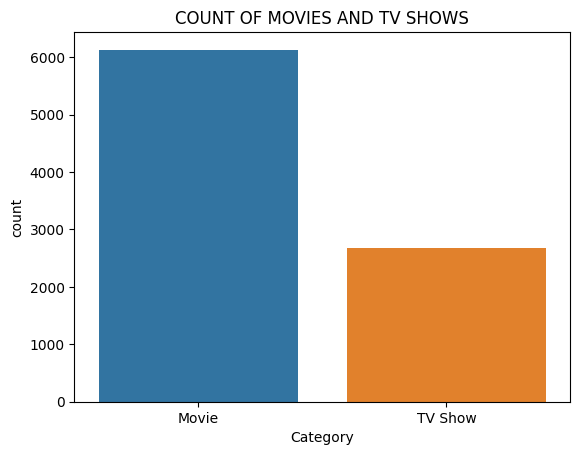

In [32]:
sns.countplot(data=df ,x='type')
plt.title("COUNT OF MOVIES AND TV SHOWS")
plt.xlabel("Category")
plt.show()

In [33]:
Movies = df[df['type']=='Movie']
df_movie = Movies.groupby('release_year')["type"].count()
df_movie = df_movie.to_frame().reset_index()
df_movie = df_movie.rename(columns ={"type":"total count"})
movies_char  = px.line(df_movie,x= 'release_year',y='total count',title='Number of Movies Released')
movies_char 

In [34]:
Tv_Show = df[df['type']=='TV Show']
df_Tv_Show = Tv_Show.groupby('release_year')["type"].count()
df_Tv_Show = df_Tv_Show.to_frame().reset_index()
df_Tv_Show = df_Tv_Show.rename(columns ={"type":"total count"})
Tv_char = px.line(df_Tv_Show,x= 'release_year',y='total count',title='Number of Tv_Shows Released')
Tv_char.show() 

In [35]:
countries = df[df["country"]!="he country is unknown"]
country =countries["country"].value_counts().reset_index()
country = country.head()
top_country = px.bar(data_frame=country,x='country',y='count',color='country')
top_country

In [36]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director not specified,director not specified,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Julien Leclercq,The country is unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,director not specified,director not specified,The country is unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,director not specified,director not specified,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,David Fincher,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,director not specified,director not specified,The country is unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [37]:
df.head

<bound method NDFrame.head of      show_id     type                  title                director  \
0         s1    Movie   Dick Johnson Is Dead         Kirsten Johnson   
1         s2  TV Show          Blood & Water  director not specified   
2         s3  TV Show              Ganglands         Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans  director not specified   
4         s5  TV Show           Kota Factory  director not specified   
...      ...      ...                    ...                     ...   
8802   s8803    Movie                 Zodiac           David Fincher   
8803   s8804  TV Show            Zombie Dumb  director not specified   
8804   s8805    Movie             Zombieland         Ruben Fleischer   
8805   s8806    Movie                   Zoom            Peter Hewitt   
8806   s8807    Movie                 Zubaan             Mozez Singh   

                        cast                 country          date_added  \
0            Kirsten Johnson 

In [38]:
duration=df["duration"].value_counts().reset_index()
country = country.head()
top_country = px.bar(data_frame=country,x='country',y='count',color='country')
top_country